In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/customer_churn_data.csv')
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


In [6]:
df.isna().sum().sum()

np.int64(297)

In [7]:
df["InternetService"] = df["InternetService"].fillna("")

In [8]:
df.isna().sum().sum()

np.int64(0)

In [9]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,,2208.32,No,Yes


In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


In [12]:
numeric_columns_data = df.select_dtypes(include = ["number"])
numeric_columns_data.corr()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
CustomerID,1.000000,0.036730,-0.018585,-0.030504,-0.027490
Age,0.036730,1.000000,0.000472,0.006362,-0.001896
Tenure,-0.018585,0.000472,1.000000,-0.014552,0.894868
MonthlyCharges,-0.030504,0.006362,-0.014552,1.000000,0.304893
TotalCharges,-0.027490,-0.001896,0.894868,0.304893,1.000000


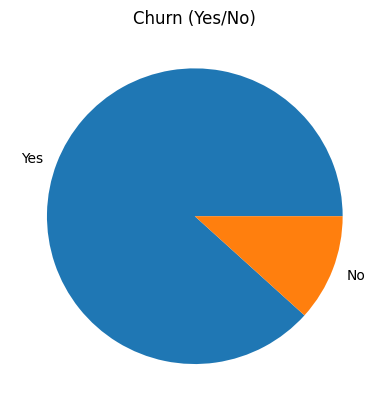

In [13]:
df["Churn"].value_counts().plot(kind="pie")
plt.title("Churn (Yes/No)")
plt.ylabel("")
plt.show()

In [14]:
df.groupby("Churn")["MonthlyCharges"].mean()

,MonthlyCharges
Churn,
No,62.54641
Yes,75.96077


In [15]:
df.groupby(["Churn","Gender"])["MonthlyCharges"].mean()

Churn  Gender
No     Female    65.091912
       Male      59.013878
Yes    Female    74.975064
       Male      77.082518
Name: MonthlyCharges, dtype: float64

In [16]:
df.groupby("Churn")["Tenure"].mean()

,Tenure
Churn,
No,30.264957
Yes,17.476784


In [17]:
df.groupby("Churn")["Age"].mean()

,Age
Churn,
No,43.487179
Yes,44.831257


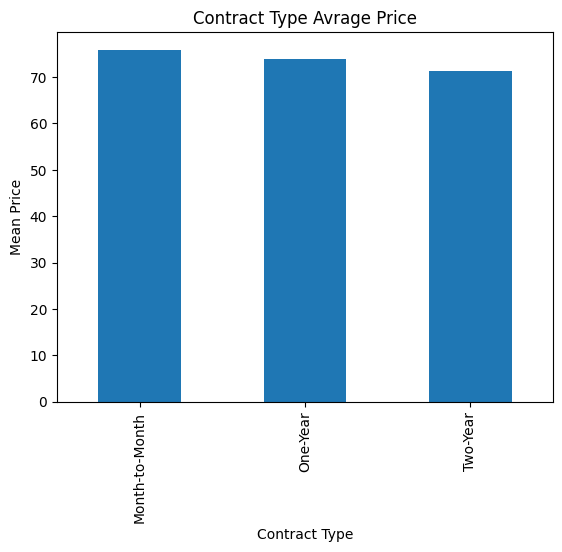

In [18]:
df.groupby("ContractType")["MonthlyCharges"].mean().plot(kind="bar")
plt.title("Contract Type Avrage Price")
plt.ylabel("Mean Price")
plt.xlabel("Contract Type")
plt.show()

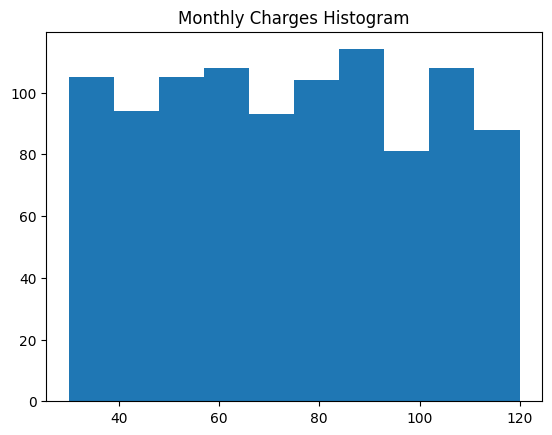

In [19]:
plt.hist(df["MonthlyCharges"])
plt.title("Monthly Charges Histogram")
plt.show()

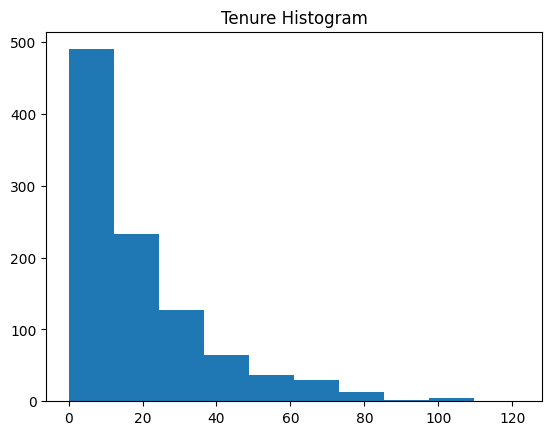

In [20]:
plt.hist(df["Tenure"])
plt.title("Tenure Histogram")
plt.show()

Feature Engineering

In [21]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'MonthlyCharges',
       'ContractType', 'InternetService', 'TotalCharges', 'TechSupport',
       'Churn'],
      dtype='object')

In [22]:
df.head(1)

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.4,Yes,Yes


In [23]:
y = df["Churn"]
x = df [["Age","Gender","Tenure","MonthlyCharges"]]

In [24]:
x #1 Female / 0 Male

,Age,Gender,Tenure,MonthlyCharges
0,49,Male,4,88.35
1,43,Male,0,36.67
2,51,Female,2,63.79
3,60,Female,8,102.34
4,42,Male,32,69.01
...,...,...,...,...
995,42,Male,41,37.14
996,62,Male,9,80.93
997,51,Female,15,111.72
998,39,Male,68,65.67


In [25]:
x["Gender"] = x["Gender"].apply(lambda x: 1 if x == "Female" else 0)

/tmp/ipython-input-2979086490.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["Gender"] = x["Gender"].apply(lambda x: 1 if x == "Female" else 0)


In [26]:
x.head()

,Age,Gender,Tenure,MonthlyCharges
0,49,0,4,88.35
1,43,0,0,36.67
2,51,1,2,63.79
3,60,1,8,102.34
4,42,0,32,69.01


In [27]:
type(x["Gender"][0])

numpy.int64

In [28]:
y

,Churn
0,Yes
1,Yes
2,Yes
3,Yes
4,Yes
...,...
995,Yes
996,Yes
997,Yes
998,Yes


In [29]:
y = y.apply(lambda x: 1 if x == "Yes" else 0)

In [30]:
type(y[0])

numpy.int64

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [32]:
x

,Age,Gender,Tenure,MonthlyCharges
0,49,0,4,88.35
1,43,0,0,36.67
2,51,1,2,63.79
3,60,1,8,102.34
4,42,0,32,69.01
...,...,...,...,...
995,42,0,41,37.14
996,62,0,9,80.93
997,51,1,15,111.72
998,39,0,68,65.67


In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()

In [35]:
x_train = scaler.fit_transform(x_train)

In [36]:
import joblib
joblib.dump(scaler,"scaler.pkl")

['scaler.pkl']

In [37]:
x_test = scaler.fit_transform(x_test)

In [38]:
x_train

array([[-0.27936177, -1.06725697,  2.28080878,  0.92037124],
       [ 0.02664838,  0.93698147,  0.11295321,  1.12221019],
       [-0.38136516, -1.06725697,  0.69457299, -1.00540975],
       ...,
       [ 0.23065515, -1.06725697,  1.91068709,  0.16723494],
       [ 0.02664838,  0.93698147, -0.36291753,  1.6909211 ],
       [-0.38136516,  0.93698147,  0.06007868, -0.87045469]])

In [39]:
from sklearn.metrics import accuracy_score
def modelperformance(predictions):
  print("Accuracy score on model is {}".format(accuracy_score(y_test, predictions)))

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
log_model = LogisticRegression()

In [43]:
import warnings
warnings.filterwarnings("ignore")

In [44]:
log_model.fit(x_train, y_train)

LogisticRegression()

In [45]:
y_pred = log_model.predict(x_test)

In [46]:
modelperformance(y_pred)

Accuracy score on model is 0.885


In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
param_grid = {"n_neighbors":(3,5,7,9),"weights":("uniform","distance")}

In [49]:
gridkn = GridSearchCV(KNeighborsClassifier(),param_grid,cv=5)

In [50]:
gridkn.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': (3, 5, 7, 9),
                         'weights': ('uniform', 'distance')})

In [51]:
gridkn.best_params_

{'n_neighbors': 9, 'weights': 'distance'}

In [52]:
y_pred = gridkn.predict(x_test)

In [53]:
modelperformance(y_pred)

Accuracy score on model is 0.88


In [54]:
from sklearn.svm import SVC

In [55]:
svm = SVC()

In [56]:
param_grid = {
    "C" :[0.01,0.1,0.5,1],
    "kernel":["linear","poly","rbf"]
}

In [57]:
gridsvc = GridSearchCV(svm, param_grid, cv =5)

In [58]:
gridsvc.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5, 1],
                         'kernel': ['linear', 'poly', 'rbf']})

In [59]:
gridsvc.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [60]:
y_pred = gridsvc.predict(x_test)

In [61]:
modelperformance(y_pred)

Accuracy score on model is 0.885


In [62]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
param_grid = {
    "criterion":["gini","entropy"],
    "max_depth":[None, 10,20,30],
    "splitter":["best","random"],
    "min_samples_split":[2,5,10]
}

In [64]:
grid_tree = GridSearchCV(DecisionTreeClassifier(),param_grid,cv=5)

In [65]:
grid_tree.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [68]:
grid_tree.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'min_samples_split': 10,
 'splitter': 'random'}

In [69]:
y_pred = grid_tree.predict(x_test)

In [70]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1])

In [71]:
modelperformance(y_pred)

Accuracy score on model is 0.855


In [72]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier()

In [73]:
param_grid ={
    "n_estimators":[32,64,189,256],
    "max_features":[2,3,4],
    "bootstrap":[True,False]
}


In [74]:
grid_rfc = GridSearchCV(rfc_model,param_grid,cv=5)

In [75]:
grid_rfc.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [32, 64, 189, 256]})

In [76]:
grid_rfc.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 32}

In [77]:
y_pred = grid_rfc.predict(x_test)

In [78]:
modelperformance(y_pred)

Accuracy score on model is 0.85


In [80]:
best_model = gridsvc.best_estimator_

In [81]:
joblib.dump(best_model,"model.pkl")

['model.pkl']

In [82]:
x.columns

Index(['Age', 'Gender', 'Tenure', 'MonthlyCharges'], dtype='object')